In [8]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("train_strokes.csv")
df = df.drop(['id'], axis=1)

In [13]:
df.shape[0]

43400

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [16]:
df['stroke'].value_counts(normalize=True)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

In [17]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

array([[<AxesSubplot:title={'center':'stroke'}>]], dtype=object)

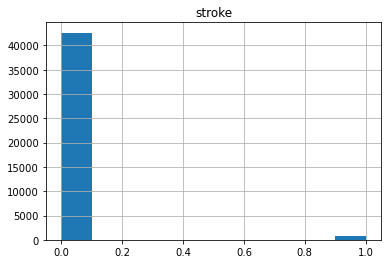

In [18]:
df.hist(column = 'stroke')

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

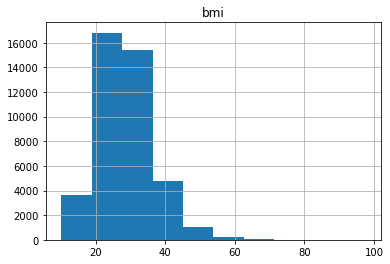

In [19]:
df.hist(column = "bmi")

In [20]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
10768,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
19748,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
26831,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


In [21]:
df = df.drop(df[df['gender'] == 'Other'].index)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

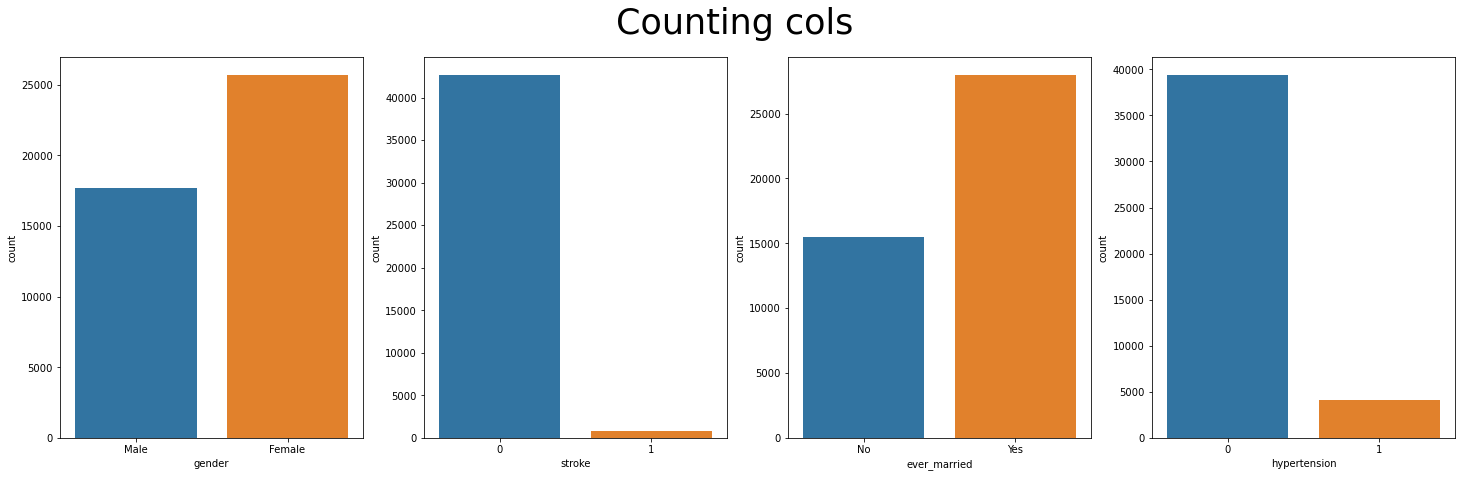

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Counting cols", fontsize=35)

sns.countplot(x="gender", data=df,ax=ax1)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="ever_married", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

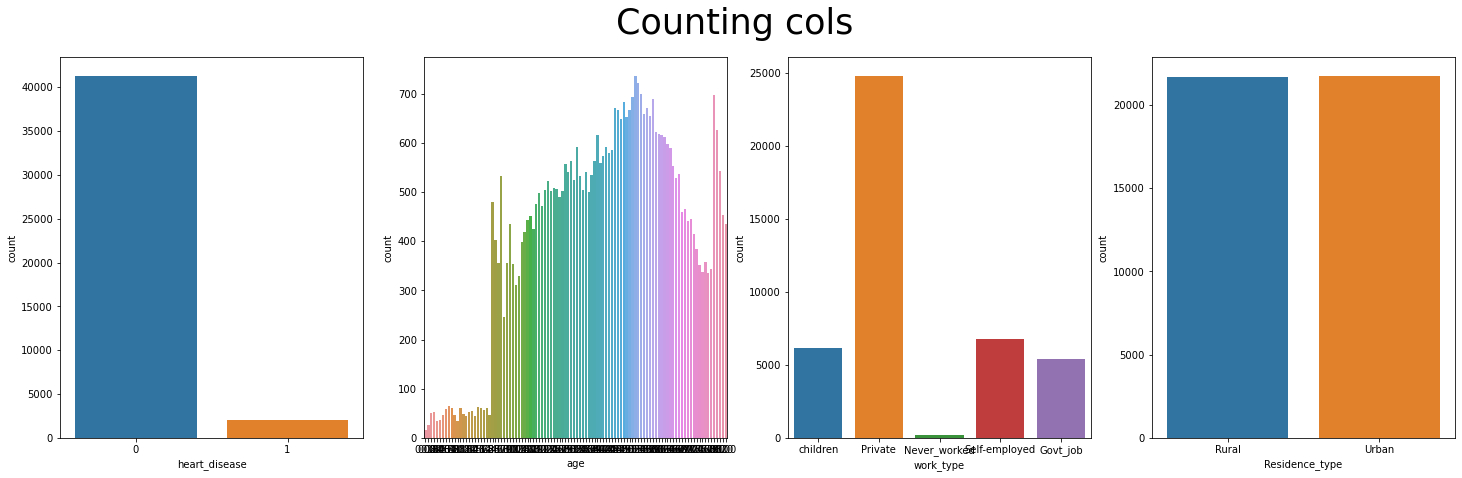

In [23]:
fig, (ax5, ax6, ax7, ax8) = plt.subplots(1,4,figsize=(25,7))
fig.suptitle("Counting cols", fontsize=35)
sns.countplot(x="heart_disease", data=df,ax=ax5)
sns.countplot(x="age", data=df,ax=ax6)
sns.countplot(x="work_type", data=df,ax=ax7)
sns.countplot(x="Residence_type", data=df,ax=ax8)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

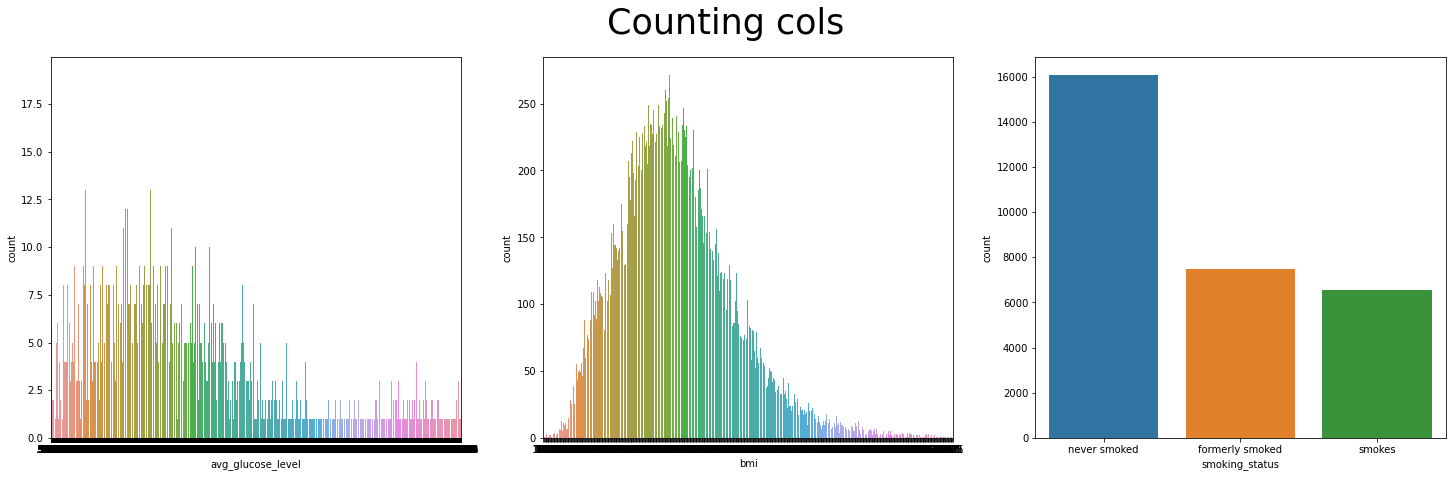

In [24]:
fig, (ax9, ax10, ax11) = plt.subplots(1,3,figsize=(25,7))
fig.suptitle("Counting cols", fontsize=35)
sns.countplot(x="avg_glucose_level", data=df,ax=ax9)
sns.countplot(x="bmi", data=df,ax=ax10)
sns.countplot(x="smoking_status", data=df,ax=ax11)

<AxesSubplot:xlabel='stroke', ylabel='age'>

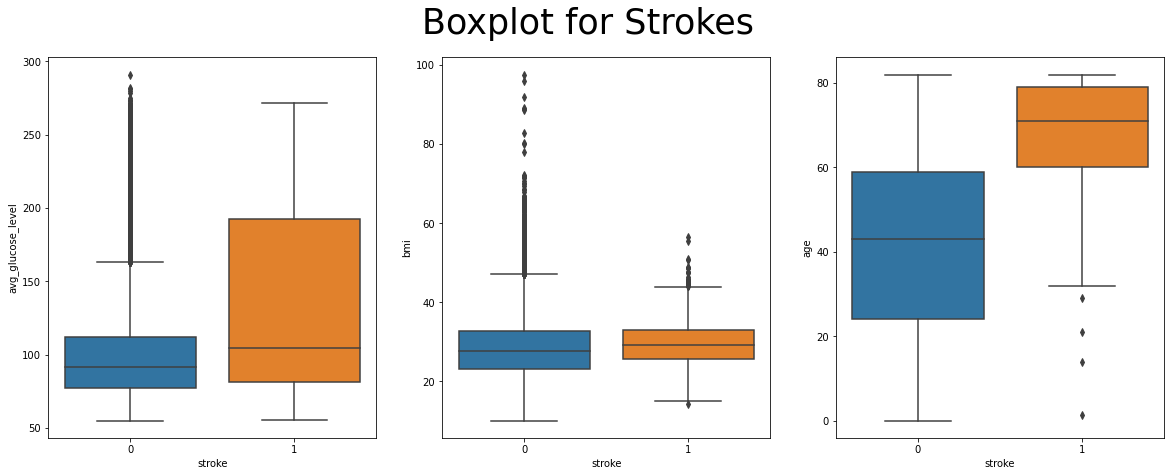

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Boxplot for Strokes", fontsize=35)

sns.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)


In [26]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
residence_type_df = df.groupby(["Residence_type"])['stroke'].agg(['sum','count']).reset_index()
residence_type_df['risk of stroke'] = residence_type_df['sum'] / residence_type_df['count'] * 100
residence_type_df

,Residence_type,sum,count,risk of stroke
0,Rural,384,21638,1.774656
1,Urban,399,21751,1.834398


In [27]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1458
smoking_status       13290
stroke                   0
dtype: int64

In [28]:
df[df['bmi'].isnull() & df["stroke"] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
407,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1613,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
42530,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1
42839,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1
43007,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1
43100,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1


In [29]:
df[df['smoking_status'].isnull() & df["stroke"] == 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
407,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
426,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1
747,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1315,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
42110,Female,80.0,0,0,No,Private,Urban,222.87,NaN,NaN,1
42569,Male,60.0,0,0,Yes,Private,Urban,88.57,44.6,NaN,1
43051,Female,80.0,0,0,Yes,Self-employed,Rural,114.61,21.4,NaN,1
43130,Female,82.0,0,1,Yes,Self-employed,Urban,118.61,29.4,NaN,1


In [30]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
work_type_df = df.groupby(["work_type"])['stroke'].agg(['sum','count']).reset_index()
work_type_df['risk of stroke'] = work_type_df['sum'] / work_type_df['count'] * 100
work_type_df

,work_type,sum,count,risk of stroke
0,Govt_job,89,5438,1.636631
1,Never_worked,0,177,0.000000
2,Private,441,24827,1.776292
3,Self-employed,251,6793,3.694980
4,children,2,6154,0.032499


In [31]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
smoking_status_df = temp.groupby(["smoking_status"])['stroke'].agg(['sum','count']).reset_index()
smoking_status_df['risk of stroke'] = smoking_status_df['sum'] / smoking_status_df['count'] * 100
smoking_status_df

#suprisingly according to those who had stroke and their smoking status was logged formerly smoked status had a higher
#risk than currently smokes

#would love to know what the true results would be if many stroke patients had their smoking_status measured 

,smoking_status,sum,count,risk of stroke
0,formerly smoked,221,7487,2.951783
1,never smoked,284,16051,1.769360
2,smokes,133,6561,2.027130


In [32]:
temp = df
temp['stroke'] = temp['stroke'].astype(int)
ever_married_df = temp.groupby(["ever_married"])['stroke'].agg(['sum','count']).reset_index()
ever_married_df['risk of stroke'] = ever_married_df['sum'] / ever_married_df['count'] * 100
ever_married_df

# question is how correlated is this to age (older individuals have higher chance of having been married)
# -> is age really what is an important feature here or is marital status

,ever_married,sum,count,risk of stroke
0,No,80,15456,0.517598
1,Yes,703,27933,2.516736


In [33]:
# drop these columns to prevent answer leaking into data
df = df.drop('smoking_status', axis = 1)
df = df.drop('bmi', axis = 1)

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,0
2,Female,8.0,0,0,No,Private,Urban,110.89,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,0


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np

In [36]:
encoder = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer([
    ('encoder', encoder, [0, 4, 5, 6])
], remainder='passthrough')

newDF = ct.fit_transform(df)

In [37]:
X, y = np.delete(newDF, -1, axis=1), newDF[:, -1]

In [38]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote_enn = SMOTEENN(random_state=0)


X_resampled, y_resampled = smote_enn.fit_resample(X, y)


smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [40]:
len(newDF[0])

16